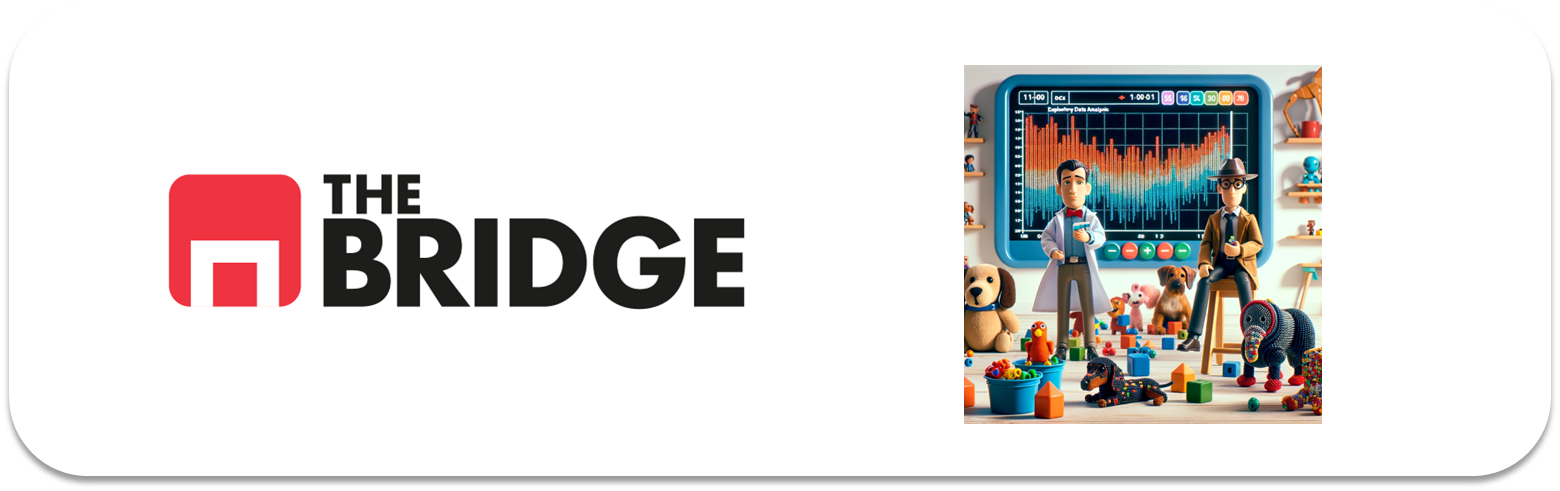

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency 
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_combined_graphs,plot_grouped_histograms


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df = pd.read_csv('./data/titanic.csv')

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:

columnas_a_eliminar = ["deck", "survived", "pclass", "embarked"]
df = df.drop(columns=columnas_a_eliminar)
print(df.head())


      sex   age  sibsp  parch     fare  class    who  adult_male  embark_town  \
0    male  22.0      1      0   7.2500  Third    man        True  Southampton   
1  female  38.0      1      0  71.2833  First  woman       False    Cherbourg   
2  female  26.0      0      0   7.9250  Third  woman       False  Southampton   
3  female  35.0      1      0  53.1000  First  woman       False  Southampton   
4    male  35.0      0      0   8.0500  Third    man        True  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:

df['family_members'] = df['parch'] + df['sibsp']
df = df.drop(columns=["parch", "sibsp"])
print(df.head())


      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
moda_embark_town = df['embark_town'].mode()[0] 
df['embark_town'] = df['embark_town'].fillna(moda_embark_town)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
# Calcular la media de la edad para cada grupo en "who"
mean_age_by_who = df.groupby('who')['age'].transform(lambda x: x.fillna(x.mean()))

# Imputar la media de la edad considerando la columna "who"
df['age'] = mean_age_by_who

# Mostrar las primeras filas del DataFrame resultante
print(df.head())

      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño?


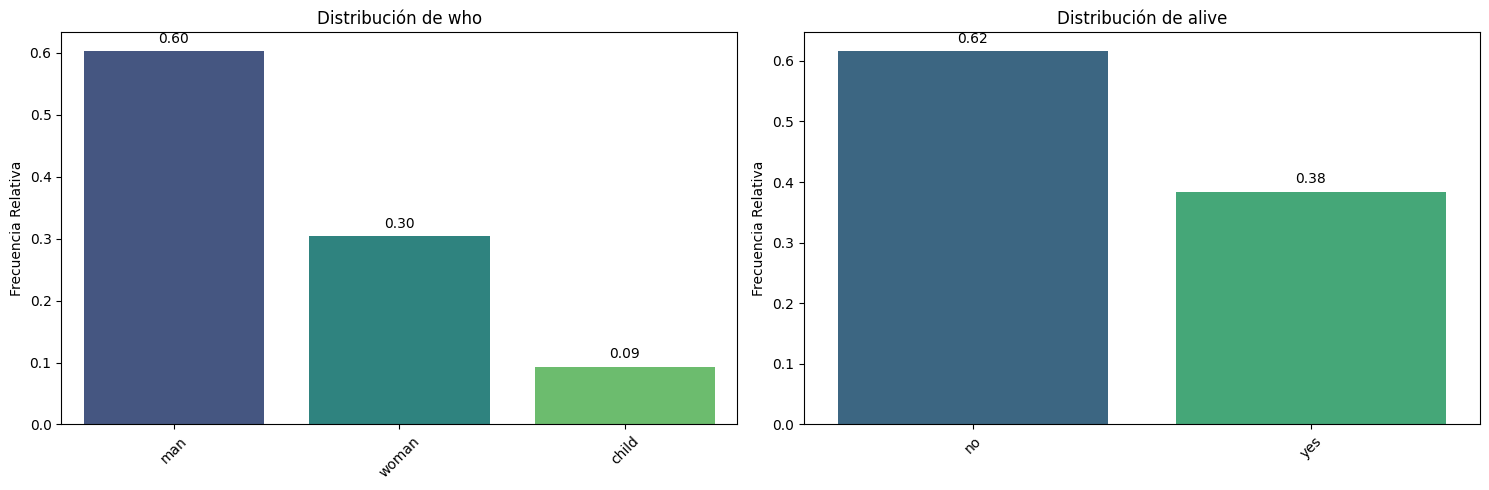

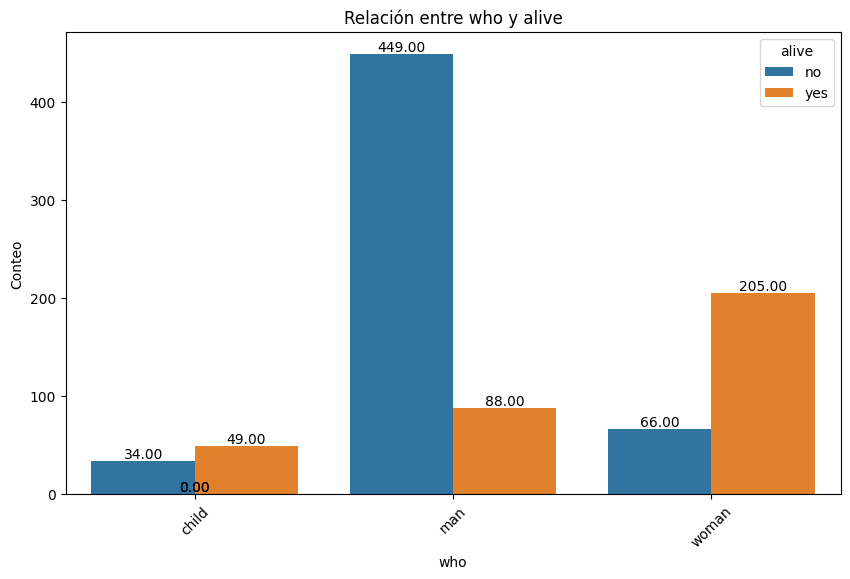

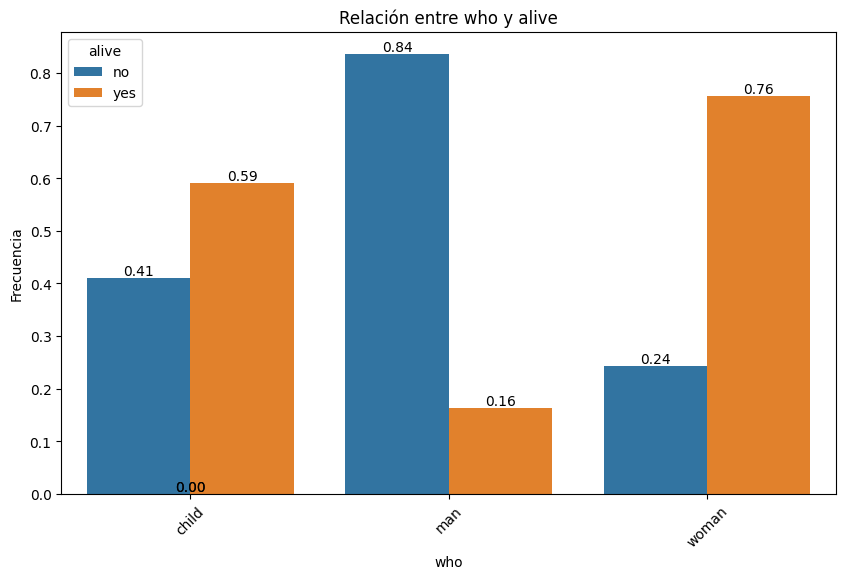

alive   no  yes
who            
child   34   49
man    449   88
woman   66  205
Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas: [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]
Rechazamos la hipótesis nula: Hay una relación estadísticamente significativa entre el género y la supervivencia.
2. En términos absolutos, ¿de qué clase sobrevivieron más pasajeros? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?


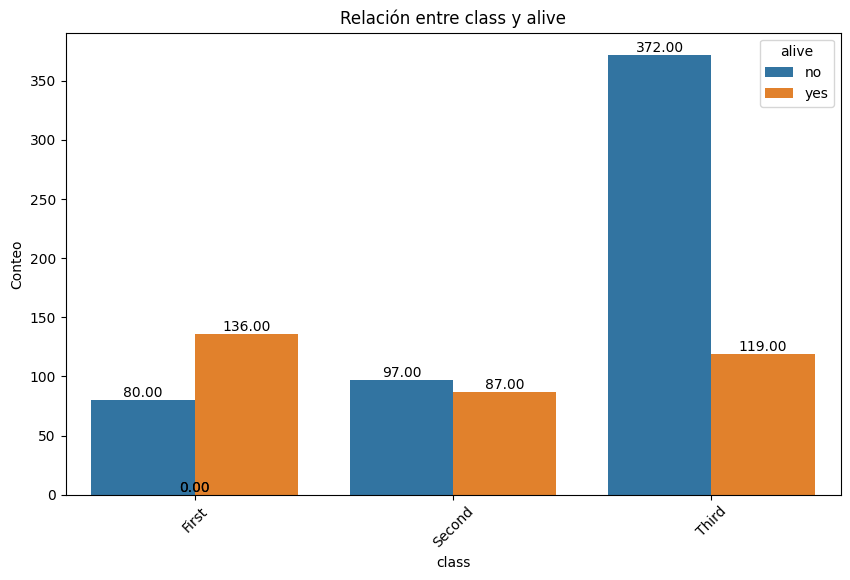

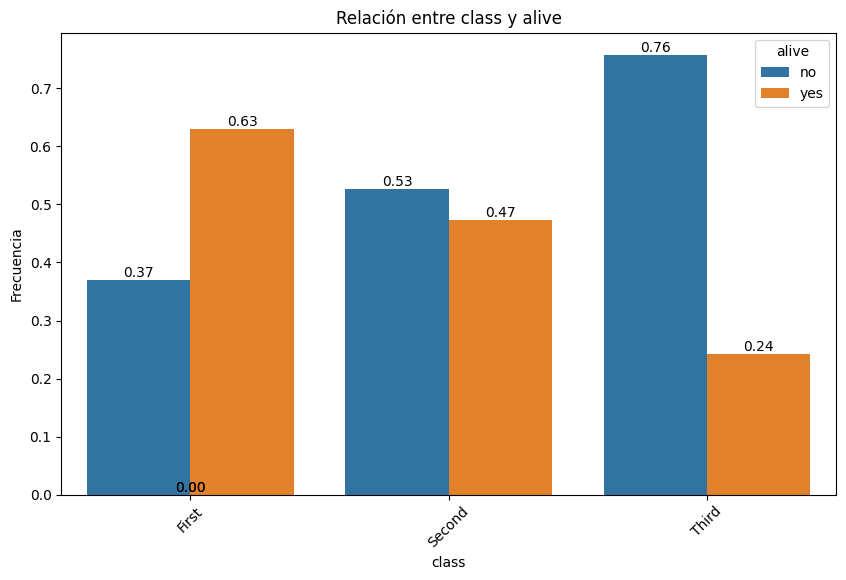

alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119
Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas: [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
Rechazamos la hipótesis nula: Hay una relación estadísticamente significativa entre la clase y la supervivencia.
3. ¿De qué ciudad sobrevivieron más personas? ¿Y porcentualmente de qué ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?


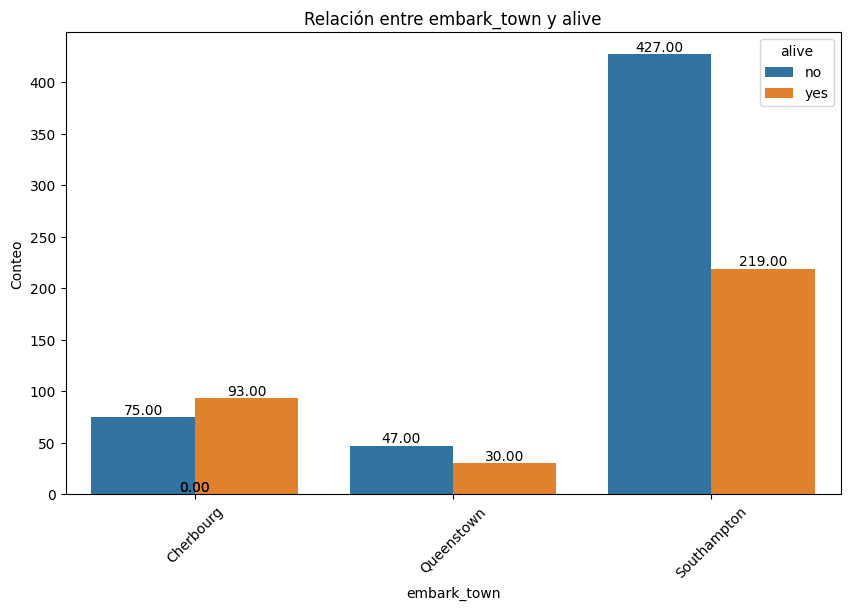

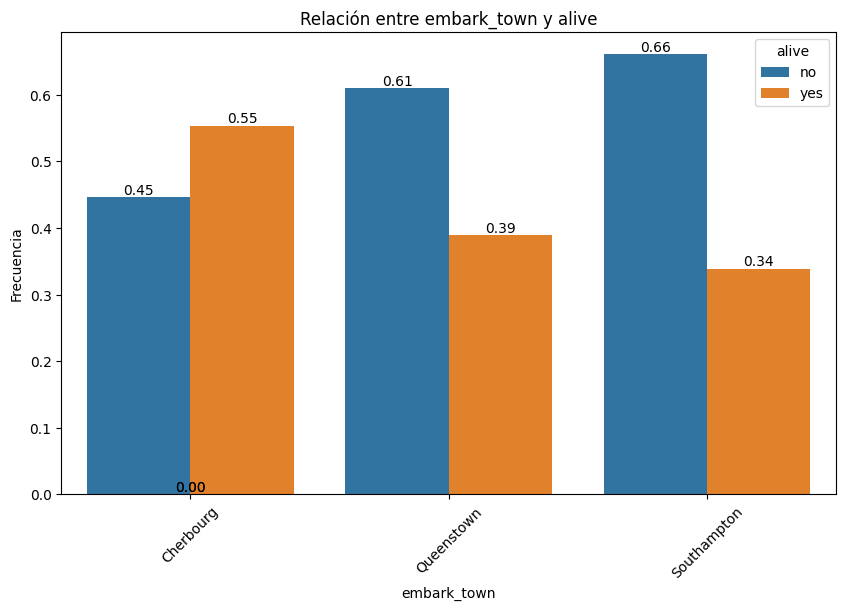

alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219
Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas: [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]
Rechazamos la hipótesis nula: Hay una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia.
4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
(2,)


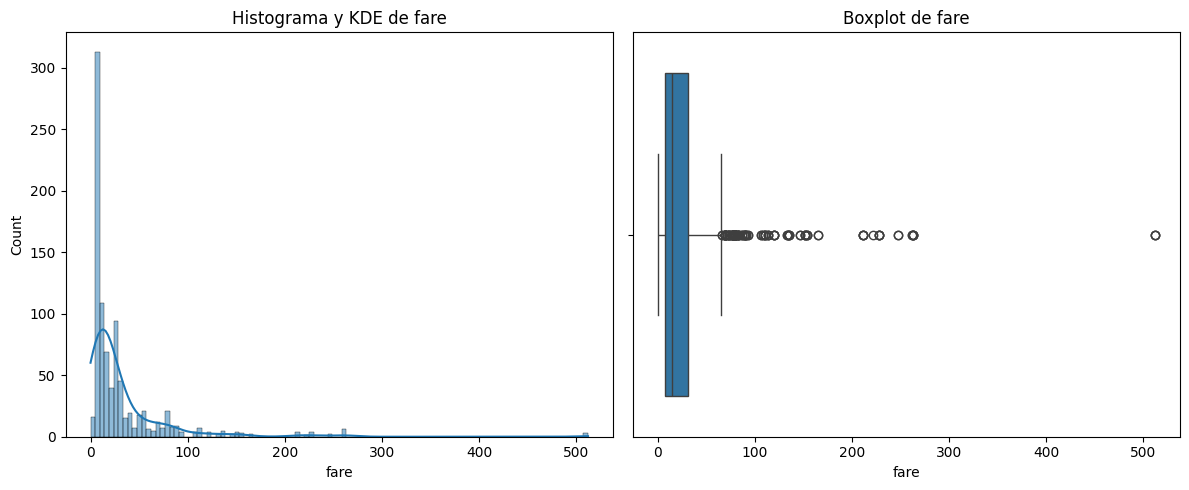

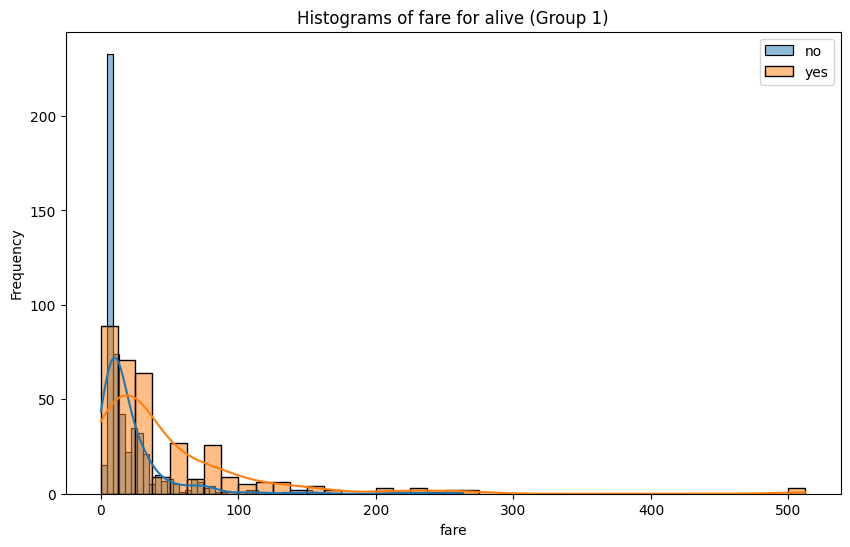

5. Existen pasajeros que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampto

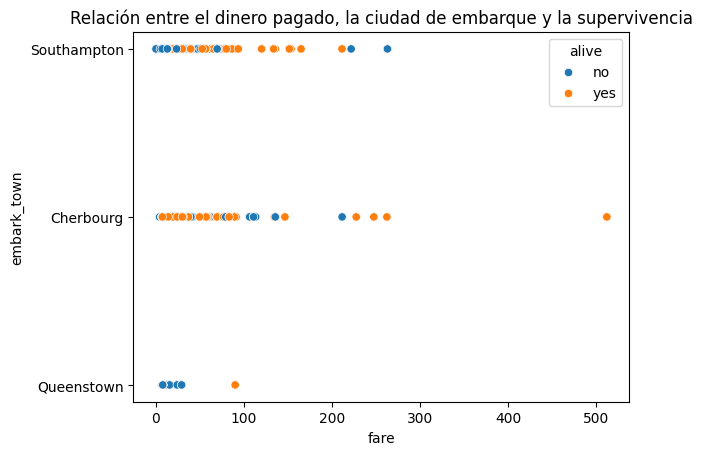

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?
      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members age_group  
0               1     adult  
1               1     adult  
2               0     adult  
3               1     adult  
4               0     adult  


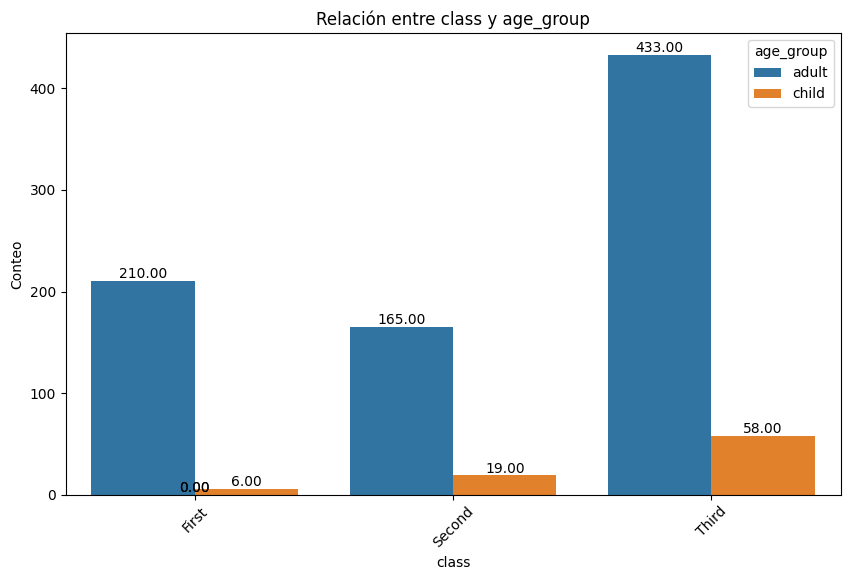

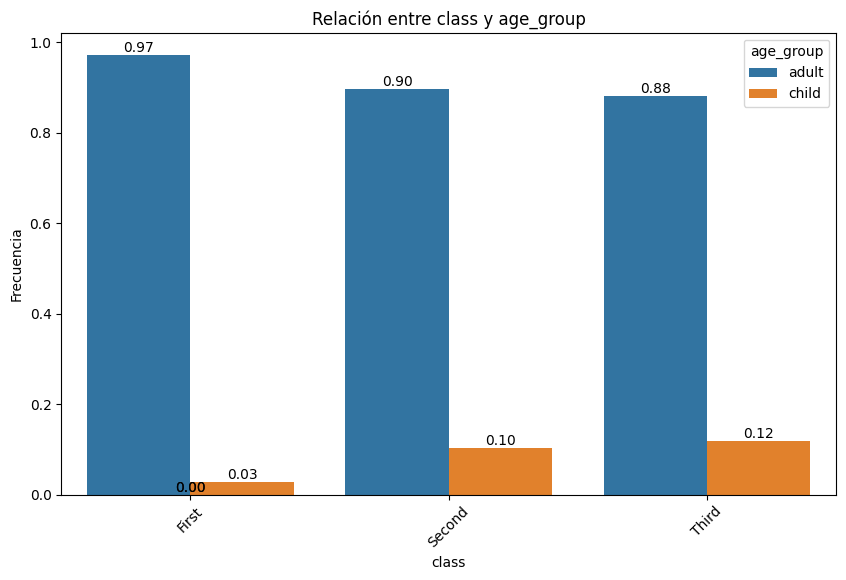

age_group  adult  child
class                  
First        210      6
Second       165     19
Third        433     58
8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?


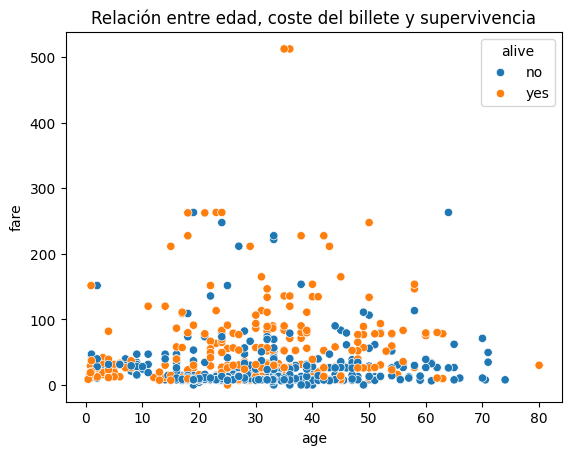

In [16]:
# 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño?
print("1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño?")
pinta_distribucion_categoricas(df, ["who", "alive"], relativa=True, mostrar_valores=True)
plot_categorical_relationship_fin(df, "who", "alive", show_values=True)
plot_categorical_relationship_fin(df, "who", "alive", relative_freq=True, show_values=True)
tabla_contingencia_who_alive = pd.crosstab(df["who"], df["alive"])
print(tabla_contingencia_who_alive)

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_who_alive)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:", expected)

if p < 0.05:
    print("Rechazamos la hipótesis nula: Hay una relación estadísticamente significativa entre el género y la supervivencia.")
else:
    print("No rechazamos la hipótesis nula: No hay una relación estadísticamente significativa entre el género y la supervivencia.")

# 2. En términos absolutos, ¿de qué clase sobrevivieron más pasajeros? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
print("2. En términos absolutos, ¿de qué clase sobrevivieron más pasajeros? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?")
plot_categorical_relationship_fin(df, "class", "alive", show_values=True)
plot_categorical_relationship_fin(df, "class", "alive", relative_freq=True, show_values=True)
tabla_contingencia_class_alive = pd.crosstab(df["class"], df["alive"])
print(tabla_contingencia_class_alive)

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_class_alive)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:", expected)

if p < 0.05:
    print("Rechazamos la hipótesis nula: Hay una relación estadísticamente significativa entre la clase y la supervivencia.")
else:
    print("No rechazamos la hipótesis nula: No hay una relación estadísticamente significativa entre la clase y la supervivencia.")

# 3. ¿De qué ciudad sobrevivieron más personas? ¿Y porcentualmente de qué ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
print("3. ¿De qué ciudad sobrevivieron más personas? ¿Y porcentualmente de qué ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?")
plot_categorical_relationship_fin(df, "embark_town", "alive", show_values=True)
plot_categorical_relationship_fin(df, "embark_town", "alive", relative_freq=True, show_values=True)
tabla_contingencia_embark_town_alive = pd.crosstab(df["embark_town"], df["alive"])
print(tabla_contingencia_embark_town_alive)

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_embark_town_alive)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:", expected)

if p < 0.05:
    print("Rechazamos la hipótesis nula: Hay una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia.")
else:
    print("No rechazamos la hipótesis nula: No hay una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia.")

# 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
print("4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?")
plot_combined_graphs(df, ["fare"])
plot_grouped_histograms(df, cat_col="alive", num_col="fare", group_size=10)

# 5. Existen pasajeros que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
print("5. Existen pasajeros que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?")
# Pasajeros que no pagaron el billete
no_pagaron = df[df['fare'] == 0]
print(no_pagaron)

# Persona que pagó más
max_fare = df[df['fare'] == df['fare'].max()]
print(max_fare)

# 6. ¿Existe alguna relación entre el dinero pagado, la ciudad de embarque y la supervivencia/fallecimiento? No necesitas aplicar ningún test, muestralo numérica o visualmente.
print("6. ¿Existe alguna relación entre el dinero pagado, la ciudad de embarque y la supervivencia/fallecimiento? No necesitas aplicar ningún test, muestralo numérica o visualmente.")
sns.scatterplot(data=df, x='fare', y='embark_town', hue='alive')
plt.title('Relación entre el dinero pagado, la ciudad de embarque y la supervivencia')
plt.show()

# 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?
print("7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?")
df['age_group'] = df['who'].apply(lambda x: 'adult' if x in ['man', 'woman'] else 'child')
print(df.head())

plot_categorical_relationship_fin(df, "class", "age_group", show_values=True)
plot_categorical_relationship_fin(df, "class", "age_group", relative_freq=True, show_values=True)
tabla_contingencia_class_age_group = pd.crosstab(df["class"], df["age_group"])
print(tabla_contingencia_class_age_group)

# 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?
print("8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?")
sns.scatterplot(data=df, x='age', y='fare', hue='alive')
plt.title('Relación entre edad, coste del billete y supervivencia')
plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [20]:
df_viajes= pd.read_csv('./data/dataset_viajes_jun23.csv')
print(df_viajes.head()) 


   aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  Airbus A380       False   
3  MoldaviAir       París   Cincinnati       6370   Boeing 737       False   
4    TabarAir  Cincinnati         Roma       7480   Boeing 747       False   

      consumo_kg  duracion   ingresos        id_vuelo    mes  
0    1028.691900        51   14232.65  Air_PaGi_10737  Jun23  
1   33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23  
2  109439.907200       626  584789.19  Tab_GiLo_11380  Jun23  
3   17027.010000       503  233342.51  Mol_PaCi_10737  Jun23  
4   86115.744000       518  438535.07  Tab_CiRo_10747  Jun23  


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

   aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  Airbus A380       False   
3  MoldaviAir       París   Cincinnati       6370   Boeing 737       False   
4    TabarAir  Cincinnati         Roma       7480   Boeing 747       False   

      consumo_kg  duracion   ingresos        id_vuelo    mes  
0    1028.691900        51   14232.65  Air_PaGi_10737  Jun23  
1   33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23  
2  109439.907200       626  584789.19  Tab_GiLo_11380  Jun23  
3   17027.010000       503  233342.51  Mol_PaCi_10737  Jun23  
4   86115.744000       518  438535.07  Tab_CiRo_10747  Jun23  
Análisis multivariante entre 'ingresos', 'distancias' y 'consumo_kg'.


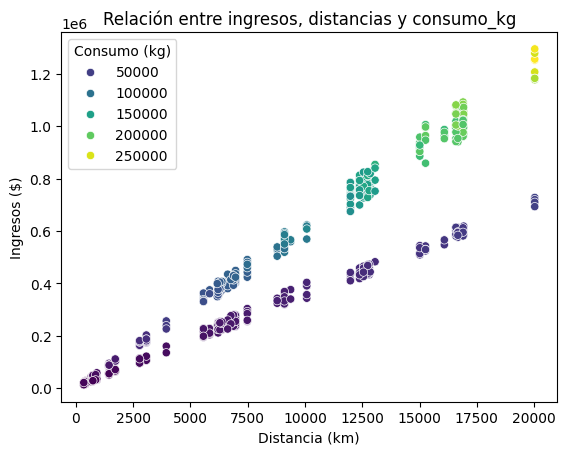

Correlaciones entre ingresos, distancia y consumo_kg:
            ingresos  distancia  consumo_kg
ingresos    1.000000   0.928833    0.944875
distancia   0.928833   1.000000    0.762341
consumo_kg  0.944875   0.762341    1.000000
Estadísticas descriptivas de las variables:
           ingresos     distancia     consumo_kg
count  6.000000e+02    600.000000     600.000000
mean   4.187689e+05   8071.003333   68240.520508
std    3.182858e+05   5550.244086   67441.849592
min    1.179785e+04    344.000000     835.920000
25%    1.627668e+05   3073.000000   15733.520400
50%    3.754817e+05   6877.000000   36033.998000
75%    6.188420e+05  12553.000000  111717.652800
max    1.295516e+06  20029.000000  264876.314560
Análisis de ingresos por compañía aérea:
aircompany
Airnar        40529397.82
FlyQ          43374852.87
MoldaviAir    72894268.81
PamPangea     55974794.70
TabarAir      38487996.70
Name: ingresos, dtype: float64


C:\Users\Pablo\AppData\Local\Temp\ipykernel_21804\3970777860.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingresos_por_compania.index, y=ingresos_por_compania.values, palette='viridis')


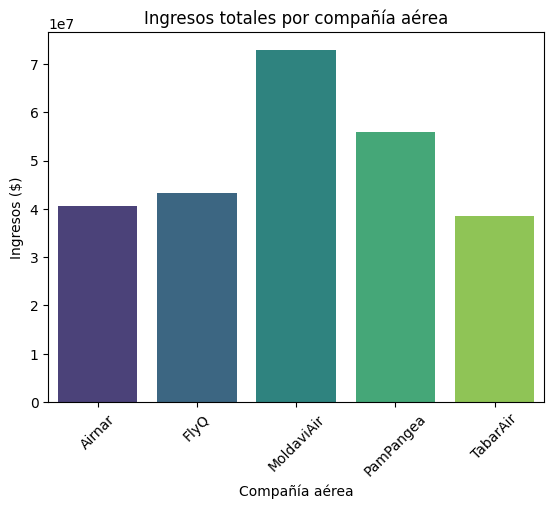

In [22]:
# Cargar los datos
df_viajes = pd.read_csv('./data/dataset_viajes_jun23.csv')
print(df_viajes.head())

# Análisis multivariante entre "ingresos", "distancias" y "consumo_kg"
print("Análisis multivariante entre 'ingresos', 'distancias' y 'consumo_kg'.")

# Gráfico de dispersión de ingresos vs distancia con consumo_kg como color
sns.scatterplot(data=df_viajes, x='distancia', y='ingresos', hue='consumo_kg', palette='viridis')
plt.title('Relación entre ingresos, distancias y consumo_kg')
plt.xlabel('Distancia (km)')
plt.ylabel('Ingresos ($)')
plt.legend(title='Consumo (kg)')
plt.show()

# Correlaciones entre las variables
correlations = df_viajes[['ingresos', 'distancia', 'consumo_kg']].corr()
print("Correlaciones entre ingresos, distancia y consumo_kg:")
print(correlations)

# Análisis descriptivo de las variables
print("Estadísticas descriptivas de las variables:")
print(df_viajes[['ingresos', 'distancia', 'consumo_kg']].describe())

# Análisis adicional de ingresos por compañía aérea
print("Análisis de ingresos por compañía aérea:")
ingresos_por_compania = df_viajes.groupby('aircompany')['ingresos'].sum()
print(ingresos_por_compania)
sns.barplot(x=ingresos_por_compania.index, y=ingresos_por_compania.values, palette='viridis')
plt.title('Ingresos totales por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.show()




### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

Análisis multivariante entre 'cat_vuelo', 'ingresos' y 'consumo_kg'.


C:\Users\Pablo\AppData\Local\Temp\ipykernel_21804\4256340296.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viajes, x='cat_vuelo', y='ingresos', palette='viridis')


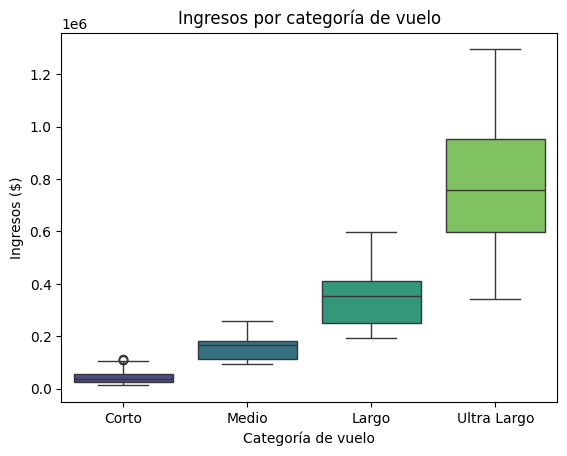

C:\Users\Pablo\AppData\Local\Temp\ipykernel_21804\4256340296.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viajes, x='cat_vuelo', y='consumo_kg', palette='viridis')


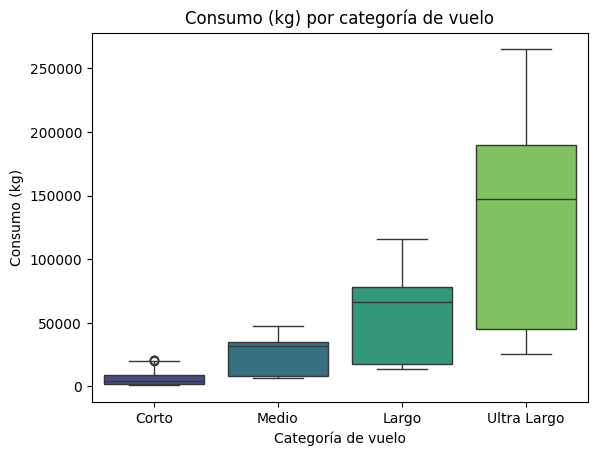

C:\Users\Pablo\AppData\Local\Temp\ipykernel_21804\4256340296.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingresos_por_categoria = df_viajes.groupby('cat_vuelo')['ingresos'].sum()
C:\Users\Pablo\AppData\Local\Temp\ipykernel_21804\4256340296.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingresos_por_categoria.index, y=ingresos_por_categoria.values, palette='viridis')


Correlaciones entre ingresos, distancia y consumo_kg:
            ingresos  distancia  consumo_kg
ingresos    1.000000   0.928833    0.944875
distancia   0.928833   1.000000    0.762341
consumo_kg  0.944875   0.762341    1.000000
Estadísticas descriptivas de las variables:
           ingresos     distancia     consumo_kg
count  6.000000e+02    600.000000     600.000000
mean   4.187689e+05   8071.003333   68240.520508
std    3.182858e+05   5550.244086   67441.849592
min    1.179785e+04    344.000000     835.920000
25%    1.627668e+05   3073.000000   15733.520400
50%    3.754817e+05   6877.000000   36033.998000
75%    6.188420e+05  12553.000000  111717.652800
max    1.295516e+06  20029.000000  264876.314560
Análisis de ingresos por categoría de vuelo:
cat_vuelo
Corto          5.586777e+06
Medio          7.448697e+06
Largo          7.081941e+07
Ultra Largo    1.674064e+08
Name: ingresos, dtype: float64


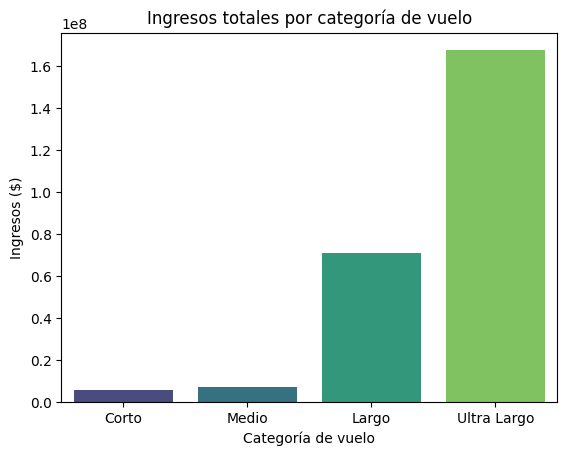

In [24]:

# Análisis multivariante entre "cat_vuelo", "ingresos" y "consumo_kg"
print("Análisis multivariante entre 'cat_vuelo', 'ingresos' y 'consumo_kg'.")

# Gráfico de cajas (boxplot) para ingresos por categoría de vuelo
sns.boxplot(data=df_viajes, x='cat_vuelo', y='ingresos', palette='viridis')
plt.title('Ingresos por categoría de vuelo')
plt.xlabel('Categoría de vuelo')
plt.ylabel('Ingresos ($)')
plt.show()

# Gráfico de cajas (boxplot) para consumo_kg por categoría de vuelo
sns.boxplot(data=df_viajes, x='cat_vuelo', y='consumo_kg', palette='viridis')
plt.title('Consumo (kg) por categoría de vuelo')
plt.xlabel('Categoría de vuelo')
plt.ylabel('Consumo (kg)')
plt.show()

# Correlaciones entre las variables
correlations = df_viajes[['ingresos', 'distancia', 'consumo_kg']].corr()
print("Correlaciones entre ingresos, distancia y consumo_kg:")
print(correlations)

# Análisis descriptivo de las variables
print("Estadísticas descriptivas de las variables:")
print(df_viajes[['ingresos', 'distancia', 'consumo_kg']].describe())

# Análisis adicional de ingresos por categoría de vuelo
print("Análisis de ingresos por categoría de vuelo:")
ingresos_por_categoria = df_viajes.groupby('cat_vuelo')['ingresos'].sum()
print(ingresos_por_categoria)
sns.barplot(x=ingresos_por_categoria.index, y=ingresos_por_categoria.values, palette='viridis')
plt.title('Ingresos totales por categoría de vuelo')
plt.xlabel('Categoría de vuelo')
plt.ylabel('Ingresos ($)')
plt.show()


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.